# Precessing Vortex Core (Part 2)

In [31]:
# HIDE CODE
import numpy as np
import matplotlib.pyplot as plt


def phantomGaussian(size, fwhm=3, center=None, scale=1, offset_x=0):
    """Create a Gaussian shape inside a rectangle"""
    x = np.arange(0, size, 1, float)
    R = size // 2
    y = x[:R, np.newaxis]

    if center is None:
        x0 = y0 = R
    else:
        x0 = center[0]
        y0 = center[1]
    output = np.exp(-4*np.log(2) * ((x-x0/scale-offset_x)**2 + (y-y0/scale)**2) / (fwhm/scale)**2)

    return output


def pvc_1(size=120, R=60, fac_x=0.951662, fac_y=0.9222):
    """Create a precessing vortex core with spatial shift"""
    
    v_x_settings = [[-0.7, 35, 0, 0],
                    [-0.4, 20, 30, -2], [-0.4, 20, -30, -2],
                    [1.1, 32, 26, 28], [1.1, 32, -26, 28],
                    [0.4, 18, 48, 28], [0.4, 18, -48, 28],
                    [-0.6, 30, 50, 54], [-0.8, 30, 30, 48], [-0.6, 30, -50, 54], [-0.8, 30, -30, 48]]
    v_x_settings = np.array(v_x_settings)
    v_x_settings[:,2] = v_x_settings[:,2]*fac_x
    v_x_settings[:,3] = v_x_settings[:,3]*fac_x
    v_x = np.zeros([R, size])
    for i in v_x_settings:
        v_x += i[0]*phantomGaussian(size, fwhm=i[1], center=[i[2]+R, i[3]])

    v_y_settings = [[1., 30, 6, 0], [-1., 30, -6, 0], [0.5, 15, 3, 0], [-0.5, 15, -3, 0],
                    [-0.3, 10, 30, 2], [0.3, 10, -30, 2], [-0.5, 10, 30, 12], [0.5, 10, -30, 12],
                    [-1, 30, 25, 40], [1, 30, -25, 40],
                    [0.8, 35, 40, 70], [-0.8, 35, -40, 70],
                    [0.7, 10, 46, 35], [-0.7, 10, -46, 35],
                    [0.3, 10, 43, 20], [-0.3, 10, -43, 20],
                    [-0.1, 30, 60, 10], [0.1, 30, -60, 10]]
    v_y_settings = np.array(v_y_settings)
    v_y_settings[:,2] = v_y_settings[:,2]*fac_y
    v_y_settings[:,3] = v_y_settings[:,3]*fac_y
    v_y = np.zeros([R, size])
    for i in v_y_settings:
        v_y += i[0]*phantomGaussian(size, fwhm=i[1], center=[i[2]+R, i[3]])
    return np.array([v_x*1.078, v_y])


def pvc_2(size=120, R=60, fac_x=1, fac_y=1):
    """Create a precessing vortex core
    """
    v_x_settings = [[0.8, 15, 0, -7],
                    [0.4, 20, 38, -8], [0.4, 20, -38, -8],
                    [-0.7, 35, 17, 12], [-0.7, 35, -17, 12],
                    [-0.6, 20, 36, 12], [-0.6, 20, -36, 12],
                    [1.1, 32, 30, 38], [1.1, 32, -30, 38],
                    [-1, 30, 52, 70], [-1, 30, 34, 70], [-1, 30, -52, 70], [-1, 30, -34, 70]]
    v_x_settings = np.array(v_x_settings)
    v_x_settings[:,2] = v_x_settings[:,2]*fac_x
    v_x_settings[:,3] = v_x_settings[:,3]*fac_x
    v_x = np.zeros([R, size])
    for i in v_x_settings:
        v_x += i[0]*phantomGaussian(size, fwhm=i[1], center=[i[2]+R, i[3]])

    v_y_settings = [[1, 30, 18, 22], [-1, 30, -18, 22],
                    [-0.3, 10, 5, 0], [0.3, 10, -5, 0],
                    [-0.8, 15, 36, 18], [0.8, 15, -36, 18], [-0.6, 15, 32, 2], [0.6, 15, -32, 2],
                    [0.1, 25, 40, -2], [-0.1, 25, -40, -2],
                    [-1, 30, 30, 50], [1, 30, -30, 50],
                    [1, 35, 53, 64], [-1, 35, -53, 64],
                    [-0.3, 30, 75, 20], [0.3, 30, -75, 20]]
    v_y_settings = np.array(v_y_settings)
    v_y_settings[:,2] = v_y_settings[:,2]*fac_y
    v_y_settings[:,3] = v_y_settings[:,3]*fac_y
    v_y = np.zeros([R, size])
    for i in v_y_settings:
        v_y += i[0]*phantomGaussian(size, fwhm=i[1], center=[i[2]+R, i[3]])
    return np.array([v_x, v_y])

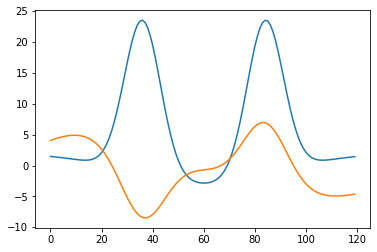

In [37]:
def gaussian(x, x0, sigma, a):
    return a*np.exp(-((x-x0)/sigma)**2)

def vy_profile(x, x1, x2, sigma1, sigma2, a, b):
    return gaussian(x, x1, sigma1, a) + gaussian(x, x2, sigma1, a) + gaussian(x, 60, sigma2, b)

def vx_profile(x, x1, x2, sigma1, a):
    return gaussian(x, x1, sigma1, -a) + gaussian(x, x2, sigma1, a) + gaussian(x, x1-25, sigma1*2, a*0.5) + gaussian(x, x2+25, sigma1*3, -a*0.5)

x = np.arange(120)
plt.plot(vy_profile(x, 36, 84, 10, 40, 25, -5)+2)
plt.plot(vx_profile(x, 36, 84, 12, 10))
plt.show()

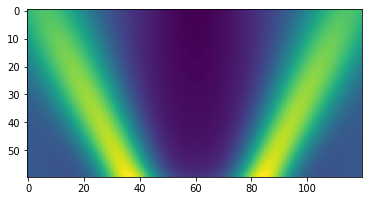

In [40]:
def create_vy(x, c1=36, c2=84, c_adjust=0.5, sig1=10,
              sig1_adjust=0.1, sig2=40, sig2_adjust=-0.2,
              amp1=25, amp1_adjust=-0.2, amp2=-5, amp2_adjust=-1):
    vy = np.zeros((60, 120))
    def mod_log(i):
        out = 0
        if i > 0:
            out = np.log(i)
        else:
            out = 0
        return out

    for i in range(60):
        vy[i, :] = vy_profile(x, c1-i*c_adjust, c2+i*c_adjust,
                            sig1+i*sig1_adjust, sig2 + i*sig2_adjust,
                            amp1 + i*amp1_adjust, amp2 + mod_log(i)*amp2_adjust) + 2
    return vy

vy = create_vy(x)
plt.imshow(np.flipud(vy))
plt.show()

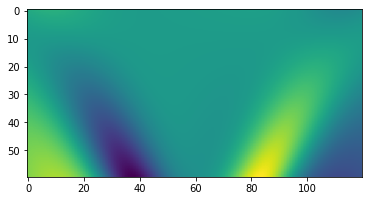

In [41]:
def create_vx(x, c1=36, c2=84, c_adjust=0.5, sig1=12,
              sig1_adjust=0.1, amp1=10, amp1_adjust=-0.2):
    vx = np.zeros((60, 120))

    for i in range(60):
        vx[i, :] = vx_profile(x, c1-i*c_adjust, c2+i*c_adjust,
                            sig1+i*sig1_adjust, 
                            amp1 + i*amp1_adjust)
    return vx

vx = create_vx(x)
plt.imshow(np.flipud(vx))
plt.show()

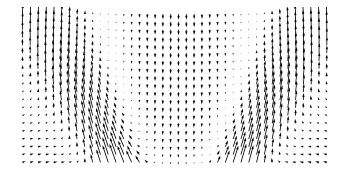

In [58]:
# define the grid
x = np.arange(-2.9, 3.1, 0.05)
y = np.arange(0, 3, 0.05)
X, Y = np.meshgrid(x, y)

x = np.arange(120)
# vector plot
_, ax = plt.subplots(1, 1, figsize=(6, 6))
v_x_avg = create_vx(x)*0.1
v_y_avg = create_vy(x)*0.1
vskip = 3
ax.quiver(X[::vskip, ::vskip], Y[::vskip, ::vskip], v_x_avg[::vskip, ::vskip],
          v_y_avg[::vskip, ::vskip], units='width')
ax.set_aspect('1')
plt.axis('off')
plt.show()

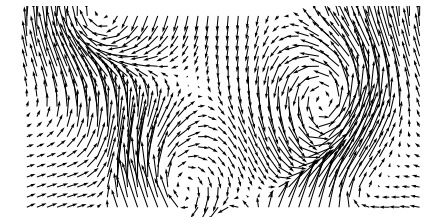

In [59]:
import matplotlib.animation as animation

f = 470 
fig = plt.figure(frameon=False, figsize=(6, 3.5))
# remove whitespace
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.set_aspect('1')
t = np.arange(8)*1/(8*f)
ims = []
for _t in t:
    v_array = pvc_1()*np.cos(2*np.pi*f*_t) + pvc_2()*np.sin(2*np.pi*f*_t)
    v_x = v_array[0, :] + v_x_avg
    v_y = v_array[1, :] + v_y_avg
    vskip = 3
    Q = ax.quiver(X[::vskip, ::vskip], Y[::vskip, ::vskip], v_x[::vskip, ::vskip],
                    v_y[::vskip, ::vskip], units='width', scale=20)
    plt.axis('off')
    ims.append([Q])

ani = animation.ArtistAnimation(fig, ims, interval=150/f*500, blit=True)
ani.save('swirl.gif', dpi=300, writer='imagemagick')